In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D
from keras.layers import BatchNormalization
from keras import initializers
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical
import json
import pandas as pd
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
K.set_image_dim_ordering('tf')

data = pd.read_json('train.json')

data = data.drop('id', 1)
data = data.drop('inc_angle', 1)



In [13]:
Y = data['is_iceberg']

data = data.drop('is_iceberg', 1)


In [14]:
X1 = data['band_1']
X2 = data['band_2']
X1 = np.array(X1)
X2 = np.array(X2)

In [15]:
X = []

for i in range(len(X1)):
    X.extend(X1[i])
    #X.extend(X2[i])

In [16]:
X = np.array(X)
X = np.reshape(X, (len(X1), 75, 75, 1))
# X = np.transpose(X, (0, 2, 3, 1))

X.shape

(1604, 75, 75, 1)

In [17]:
Y = to_categorical(Y)

Y.shape

(1604, 2)

In [18]:
image_height = 75
image_width = 75

train_samples = 1300
validation_samples = 304

epochs = 2
batch_size = 32

X_train = X[:train_samples, :, : ,:]
X_train = abs(X_train/(np.max(X_train) - np.min(X_train)))
X_test = X[train_samples:, :, :, :]
X_test = abs(X_test/(np.max(X_test) - np.min(X_test)))
Y_train = Y[:train_samples, :]
Y_test = Y[train_samples:, :]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1300, 75, 75, 1)
(304, 75, 75, 1)
(1300, 2)
(304, 2)


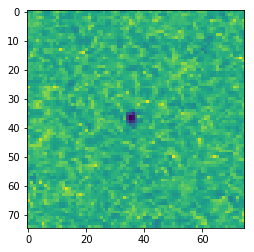

In [19]:
%matplotlib inline




elo = (X_train[9])

elo = np.reshape(elo, (75,75))
plt.imshow(elo)

In [21]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', use_bias=True, bias_initializer='zeros'))
model1.add(Dense(2, activation='softmax'))


In [22]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
model1.fit(X_train, Y_train,
              batch_size=8,
              epochs=15,
                shuffle=True)

Epoch 1/15
1300/1300 [==============================] - 24s - loss: 0.1442 - acc: 0.9431    
Epoch 2/15
1300/1300 [==============================] - 23s - loss: 0.1029 - acc: 0.9708    
Epoch 3/15
1300/1300 [==============================] - 24s - loss: 0.0601 - acc: 0.9792    
Epoch 4/15
1300/1300 [==============================] - 24s - loss: 0.0123 - acc: 0.9977    
Epoch 5/15
1300/1300 [==============================] - 23s - loss: 0.0014 - acc: 1.0000    
Epoch 6/15
1300/1300 [==============================] - 24s - loss: 2.1029e-04 - acc: 1.0000    
Epoch 7/15
1300/1300 [==============================] - 24s - loss: 1.2673e-04 - acc: 1.0000    
Epoch 8/15
1300/1300 [==============================] - 23s - loss: 9.5833e-05 - acc: 1.0000    
Epoch 9/15
1300/1300 [==============================] - 23s - loss: 7.5688e-05 - acc: 1.0000    
Epoch 10/15
1300/1300 [==============================] - 23s - loss: 6.0461e-05 - acc: 1.0000    
Epoch 11/15
1300/1300 [==========================

In [47]:
model1.save('100_acc.h5')

In [48]:
Yhat = model1.predict(X_test)

In [49]:
for i in range(len(Yhat)):
    Yhat[i, :] = np.round(Yhat[i, :])

In [50]:
print(np.sum(np.all(Yhat == Y_test, axis=1))/len(Yhat))

0.753289473684


In [ ]:
test = pd.read_json('test.json')

In [ ]:
submission = pd.DataFrame()
submission['id']=test['id']
submission['is_iceberg']=preds
submission.to_csv('sub.csv', index=False)